## Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

* target_id: pdb_id (protein database) + chain_id (chain of the monomer)
* sequence: sequence of the target protein
* temporal_cutoff: date that sequence was published
* description: Details of the origins of the sequence.
* all sequences: Contains info on all the other chains of the protein database 

In [3]:
PATH = "data/"
TRAIN_SEQUENCES_PATH = PATH + 'train_sequences.csv'
TRAIN_LABELS_PATH = PATH + 'train_labels.csv'
train_sequences = pd.read_csv(TRAIN_SEQUENCES_PATH)
train_sequences.head()

,target_id,sequence,temporal_cutoff,description,all_sequences
0,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,1995-01-26,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...
1,1RNK_A,GGCGCAGUGGGCUAGCGCCACUCAAAAGGCCCAU,1995-02-27,THE STRUCTURE OF AN RNA PSEUDOKNOT THAT CAUSES...,>1RNK_1|Chain A|RNA PSEUDOKNOT|null\nGGCGCAGUG...
2,1RHT_A,GGGACUGACGAUCACGCAGUCUAU,1995-06-03,24-MER RNA HAIRPIN COAT PROTEIN BINDING SITE F...,>1RHT_1|Chain A|RNA (5'-R(P*GP*GP*GP*AP*CP*UP*...
3,1HLX_A,GGGAUAACUUCGGUUGUCCC,1995-09-15,P1 HELIX NUCLEIC ACIDS (DNA/RNA) RIBONUCLEIC ACID,>1HLX_1|Chain A|RNA (5'-R(*GP*GP*GP*AP*UP*AP*A...
4,1HMH_E,GGCGACCCUGAUGAGGCCGAAAGGCCGAAACCGU,1995-12-07,THREE-DIMENSIONAL STRUCTURE OF A HAMMERHEAD RI...,">1HMH_1|Chains A, C, E|HAMMERHEAD RIBOZYME-RNA..."


* target_id: pdb_id + chain_id + "residue number (one-based indexing)"
* resname: The RNA nucleotide for the residue
* resid: the resid index of the nucleotide
* x1, y1, z1: the coordinates of the nucleotide

In [4]:
train_labels = pd.read_csv(TRAIN_LABELS_PATH)
train_labels.head()

,ID,resname,resid,x_1,y_1,z_1
0,1SCL_A_1,G,1,13.760,-25.974001,0.102
1,1SCL_A_2,G,2,9.310,-29.638000,2.669
2,1SCL_A_3,G,3,5.529,-27.813000,5.878
3,1SCL_A_4,U,4,2.678,-24.900999,9.793
4,1SCL_A_5,G,5,1.827,-20.136000,11.793


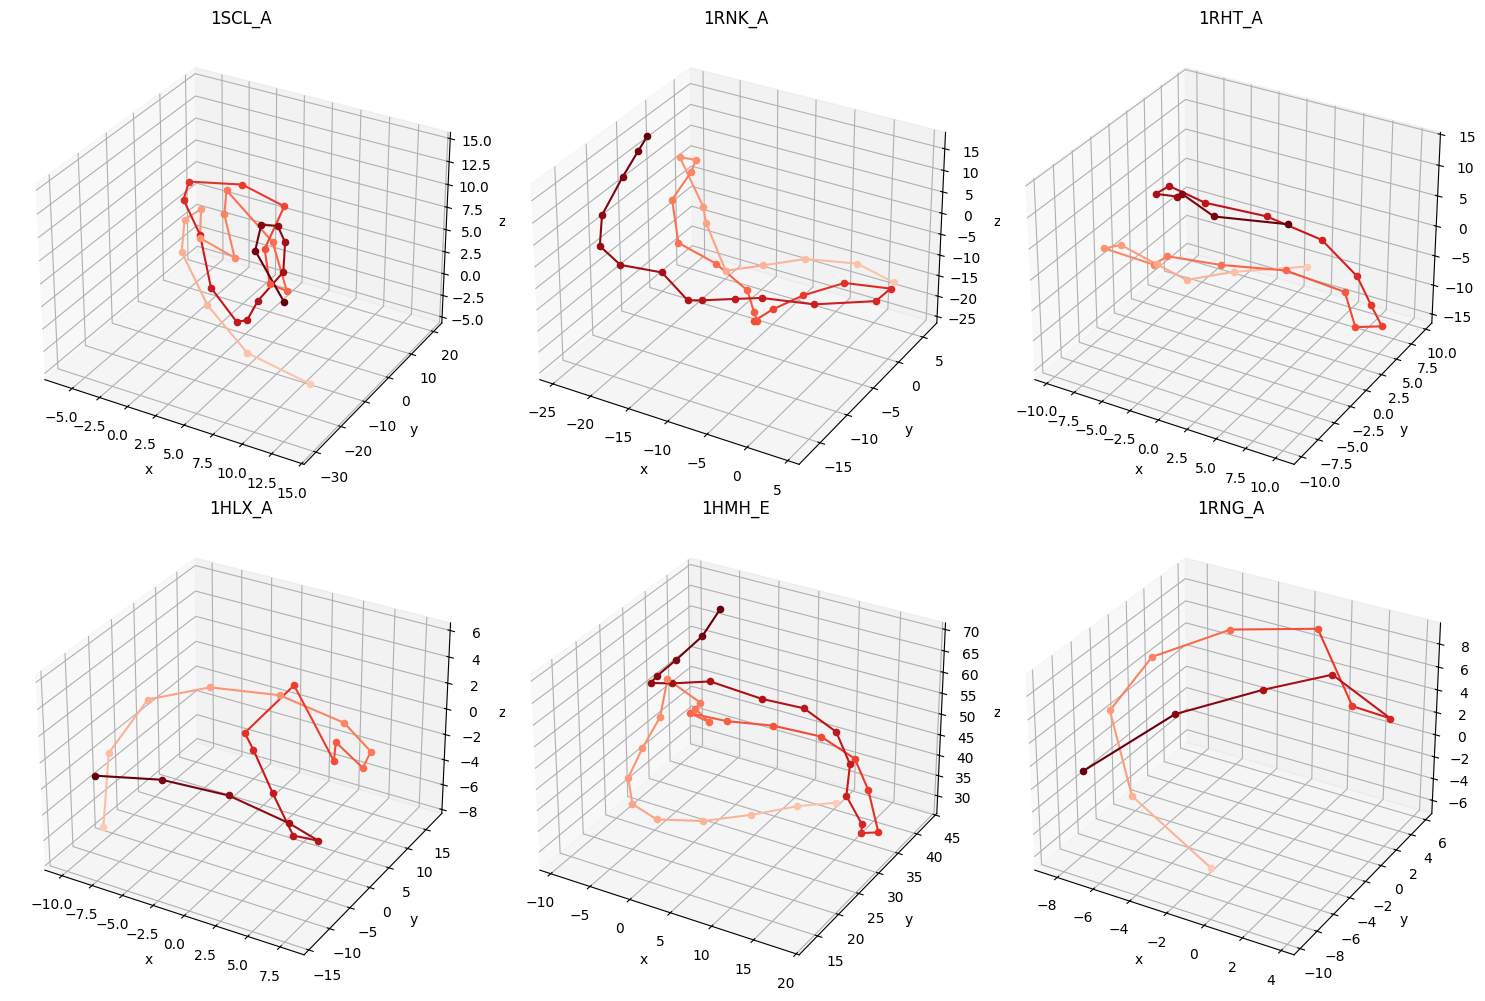

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_protein(protein, ax):
    sequence = train_sequences[train_sequences['target_id'] == protein]["sequence"].values[0]
    colors = plt.cm.Reds(np.linspace(0.2, 1, len(sequence)))
    prev_node = None
    for i,char in enumerate(sequence):
        [[x,y,z]] = train_labels[train_labels['ID'] == protein+f"_{i+1}"][["x_1","y_1","z_1"]].values
        ax.scatter(x,y,z,color=colors[i])
        if prev_node is not None:
            ax.plot([prev_node[0],x],[prev_node[1],y],[prev_node[2],z],color=colors[i])
        prev_node = [x,y,z]
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(protein)

def plot_multiple_proteins(protein_list):
    n = len(protein_list)
    cols = int(np.ceil(np.sqrt(n)))
    rows = int(np.ceil(n / cols))    
    fig = plt.figure(figsize=(5*cols, 5*rows))
    
    # Plot each protein
    for i, protein in enumerate(protein_list):
        ax = fig.add_subplot(rows, cols, i+1, projection='3d')
        plot_protein(protein, ax)
    
    return fig

proteins = train_sequences['target_id'].unique()
selected_proteins = proteins[:6] 
plot_multiple_proteins(selected_proteins)
plt.tight_layout()
plt.show()

Does MSA folder contain .fast files for all protein names?

In [6]:
import os
for protein_name in proteins:
    path = "data/MSA/" + protein_name + ".MSA.fasta"
    if not os.path.exists(path):
        print("Detected missing protein in MSA folder: ", protein_name)

In [7]:
specific_protein = train_sequences[train_sequences["target_id"]=="2NOQ_A"]
print("All sequences for 2NOQ_A:")
print("--------------------------------")
print(specific_protein["all_sequences"].values[0])

All sequences for 2NOQ_A:
--------------------------------
>2NOQ_1|Chain A|CrPV IRES|null
AAAAAUGUGAUCUUGCUUGUAAAUACAAUUUUGAGAGGUUAAUAAAUUACAAGUAGUGCUAUUUUUGUAUUUAGGUUAGCUAUUUAGCUUUACGUUCCAGGAUGCCUAGUGGCAGCCCCACAAUAUCCAGGAAGCCCUCUCUGCGGUUUUUCAGAUUAGGUAGUCGAAAAACCUAAGAAAUUUACCUGCU
>2NOQ_2|Chain B|18S ribosomal RNA|Saccharomyces cerevisiae (4932)
GCGCCGGCCAACUCCGUGCCAGCAGCCGCGGUAAUACGGAGGGCGC
>2NOQ_3|Chain C|18S ribosomal RNA|Saccharomyces cerevisiae (4932)
GCUGCAUGGCCGU
>2NOQ_4|Chain D|18S ribosomal RNA|Saccharomyces cerevisiae (4932)
UCUGGUCAGCAUGGC
>2NOQ_5|Chain E|25S ribosomal RNA|Saccharomyces cerevisiae (4932)
GGGAUGCGUAGGAUAGGUGGGAGCGCAAGCGCCGGUGAAAUACCACCCUUCCC
>2NOQ_6|Chain F|40S ribosomal protein S5|Saccharomyces cerevisiae (4932)
RYANKRFRKAQCPIIERLTNSLMMNGRNNGKKLKAVRIIKHTLDIINVLTDQNPIQVVVDAITNTGPREDTTRVGGGGAARRQAVDVSPLRRVNQAIALLTIGAREAAFRNIKTIAETLAEELINAAKGSSTSYAIKKKDELERVAKSNR
>2NOQ_7|Chain G|60S ribosomal protein L1|Saccharomyces cerevisiae (4932)
ITSSQVREHVKELLKYSNETKKRNFLE

In [8]:
train_sequences_ID = train_sequences
train_sequences_ID["protein_ID"] = train_sequences_ID["target_id"].str.split("_").str[0]
train_sequences_ID.head()
print("NAN values in train_sequences_ID:")
print(train_sequences_ID.isnull().sum())


NAN values in train_sequences_ID:
target_id          0
sequence           0
temporal_cutoff    0
description        0
all_sequences      5
protein_ID         0
dtype: int64


protein_ID
4V5Z    11
2OM7     7
1ZC8     6
2R1G     6
4V7E     5
        ..
3EQ4     1
2RPK     1
2RO2     1
3CW1     1
8Z1F     1
Name: count, Length: 735, dtype: int64


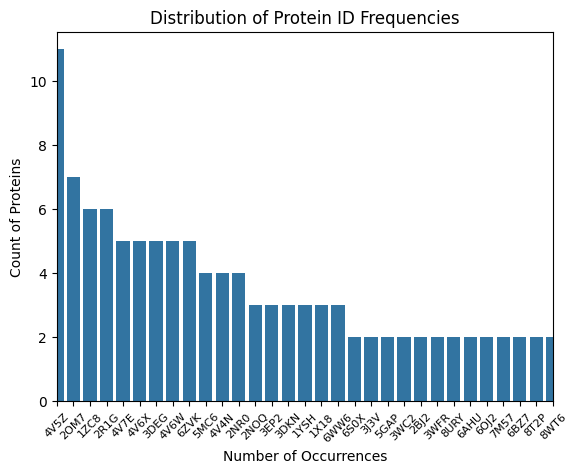

In [9]:
protein_counts = train_sequences_ID["protein_ID"].value_counts()
print(protein_counts)
sns.barplot(x=protein_counts.index,y=protein_counts.values)
plt.xlim(0,30)
plt.title("Distribution of Protein ID Frequencies")
plt.xlabel("Number of Occurrences")
plt.ylabel("Count of Proteins")
plt.xticks(rotation=45,fontsize=8)
plt.show()

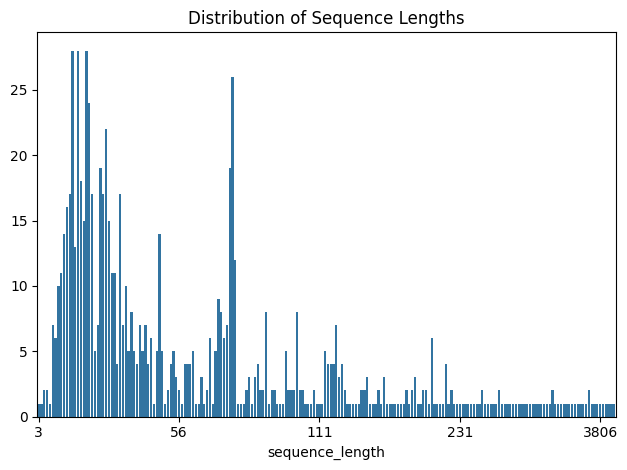

In [10]:
train_sequences_ID["sequence_length"] = train_sequences_ID["sequence"].str.len()
length_counts = train_sequences_ID["sequence_length"].value_counts().sort_index()
plt.title("Distribution of Sequence Lengths")
sns.barplot(x=length_counts.index,y=length_counts.values)
plt.xticks(np.arange(0, len(length_counts.index), 50))
plt.tight_layout()
plt.show()

* MSA data seems to be used with RhoFold? MSA contains evolutionary information that could be useful from the RNA sequence, not sure how RhoFold uses this info. I assume if you know the structure of any of the MSA you know you will be close as it will have only few mutations?

In [12]:
#filter sequences before temporal cut off date 2022-05-27 (apparently this is the date for training set)
training_data_filtered = train_sequences_ID[train_sequences_ID["temporal_cutoff"] < "2022-05-27"]